In [54]:
import torch
import torch.nn.functional as F
import csv
import itertools
import operator
import numpy as np
import nltk
import sys
from datetime import datetime
from utils import *

import matplotlib.pyplot as plt
%matplotlib inline

# Download NLTK model data (you need to do this once)
nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/kenny/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/kenny/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /Users/kenny/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/kenny/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/kenny/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/kenny/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_t

True

In [2]:
unknown_token = "UNKNOWN_TOKEN"
sentence_start_token = "SENTENCE_START"
sentence_end_token = "SENTENCE_END"

In [5]:
with open('../data/reddit-comments-2015-08.csv', 'r', newline='', encoding='utf-8') as f:
    # Initalize a reader object
    reader = csv.reader(f, skipinitialspace=True)
    # Skip the header row
    next(reader)  
    # Split full comments into sentences  - [nltk.sent_tokenize(x[0].lower()) for x in reader] - for the paragraph x[0] from the csv file, make it lowercase and tokenize all sentence
    # For all pararaphs in the csv file. * operator unpacks the list into individual sentences, and creates a single iterable
    # sentences = itertools.chain(*[nltk.sent_tokenize(x[0].lower()) for x in reader])
    sentences = itertools.chain(*[nltk.sent_tokenize(str(x).lower()) for x in reader])
    # Append SENTENCE_START and SENTENCE_END
    # Replace all sentence x in sentences with the start token, sentence body, and text token"
    sentences = ["%s %s %s" % (sentence_start_token, x, sentence_end_token) for x in sentences]
print (f"Parsed {len(sentences)} sentences.")

Parsed 68646 sentences.


In [6]:
# Tokenize the sentences into words
tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]

In [8]:
# List of lists
print(tokenized_sentences[3])

['SENTENCE_START', 'my', 'question', 'is', ',', 'is', 'it', 'wildly', 'clear', 'that', 'qb', 'has', 'the', 'highest', 'potential', 'for', 'points', '?', 'SENTENCE_END']


In [9]:
b = {}

for i in range (len(tokenized_sentences)):
    for word1, word2, in zip(tokenized_sentences[i], tokenized_sentences[i][1:]):
        # Create a tuple
        bigram = (word1, word2)
        # Index into the dictionary, update it by one
        b[bigram] = b.get(bigram, 0) + 1


In [10]:
# Taking the first 20,000 entries as our vocabulary
sorted(b.items(), key = lambda kv: -kv[1])

[(('.', 'SENTENCE_END'), 47119),
 (('SENTENCE_START', '['), 15208),
 ((']', 'SENTENCE_END'), 15011),
 (('[', '``'), 9079),
 (("''", ']'), 6963),
 (('SENTENCE_START', 'i'), 6439),
 (("'", ']'), 5952),
 ((',', 'and'), 5703),
 ((',', 'but'), 4939),
 (('.', "''"), 4927),
 (('*', '*'), 4650),
 ((']', '('), 4323),
 (('of', 'the'), 4314),
 (('in', 'the'), 4082),
 (('?', 'SENTENCE_END'), 3839),
 (('.', "'"), 3392),
 (('it', "'s"), 3313),
 ((',', 'i'), 3169),
 (('if', 'you'), 2899),
 (('do', "n't"), 2748),
 (('&', 'gt'), 2573),
 (('gt', ';'), 2573),
 (('to', 'be'), 2485),
 (('http', ':'), 2354),
 (('i', "'m"), 2336),
 (('SENTENCE_START', 'it'), 2263),
 (('SENTENCE_START', 'the'), 2231),
 (('``', ']'), 2123),
 (('to', 'the'), 2106),
 (('(', 'http'), 2101),
 (('on', 'the'), 2059),
 (('``', 'i'), 1993),
 (('[', "'"), 1848),
 (('!', 'SENTENCE_END'), 1760),
 (('is', 'a'), 1692),
 (('https', ':'), 1629),
 (('SENTENCE_START', 'if'), 1627),
 ((',', 'the'), 1593),
 (('and', 'i'), 1564),
 (('you', 'can')

In [122]:
word_set = set(word for bigram, count in sorted(b.items(), key=lambda kv: -kv[1])[:5000] for word in bigram)

In [123]:
word_set

{'http',
 'none',
 'sort=new',
 'body',
 'portion',
 'u.s.',
 'which',
 'wait',
 'mean',
 'makes',
 'result',
 '\\nhttp',
 'came',
 'hey',
 'into',
 'fact',
 'still',
 '\\n\\nif',
 'exactly',
 'job',
 'thing',
 'seriously',
 'ass',
 "wasn\\'t",
 'extra',
 'cost',
 'we',
 'enjoy',
 'issue',
 'data',
 '\\n\\nit\\',
 'country',
 '\\r\\n\\r\\n',
 'two',
 'faq',
 'all',
 'especially',
 'hold',
 'together',
 'wonder',
 'ready',
 'effort',
 'solid',
 '3',
 'nothing',
 'population',
 'throw',
 'depends',
 'told',
 'fail',
 'aside',
 'improve',
 'us',
 'mine',
 'line',
 'im',
 'maybe',
 'needed',
 'ground',
 'definition',
 'kinds',
 'current',
 'close',
 'turns',
 'alot',
 'mention',
 'millions',
 'through',
 'wiki',
 'free',
 'starting',
 'real',
 'personally',
 'says',
 'gon',
 'each',
 's',
 'universe',
 'black',
 'media',
 '//www.reddit.com/r/askreddit/wiki/index',
 'refuse',
 '?',
 'check',
 'cool',
 'plan',
 'government',
 'they',
 'life',
 'sell',
 'happy',
 'alone',
 'often',
 '\\n\\ni'

In [124]:
dim = len(word_set)
dim

1122

In [125]:
stoi = {s:i for i,s in enumerate(word_set)} # string to index
itos = {i:s for s, i in stoi.items()}
stoi

{'http': 0,
 'none': 1,
 'sort=new': 2,
 'body': 3,
 'portion': 4,
 'u.s.': 5,
 'which': 6,
 'wait': 7,
 'mean': 8,
 'makes': 9,
 'result': 10,
 '\\nhttp': 11,
 'came': 12,
 'hey': 13,
 'into': 14,
 'fact': 15,
 'still': 16,
 '\\n\\nif': 17,
 'exactly': 18,
 'job': 19,
 'thing': 20,
 'seriously': 21,
 'ass': 22,
 "wasn\\'t": 23,
 'extra': 24,
 'cost': 25,
 'we': 26,
 'enjoy': 27,
 'issue': 28,
 'data': 29,
 '\\n\\nit\\': 30,
 'country': 31,
 '\\r\\n\\r\\n': 32,
 'two': 33,
 'faq': 34,
 'all': 35,
 'especially': 36,
 'hold': 37,
 'together': 38,
 'wonder': 39,
 'ready': 40,
 'effort': 41,
 'solid': 42,
 '3': 43,
 'nothing': 44,
 'population': 45,
 'throw': 46,
 'depends': 47,
 'told': 48,
 'fail': 49,
 'aside': 50,
 'improve': 51,
 'us': 52,
 'mine': 53,
 'line': 54,
 'im': 55,
 'maybe': 56,
 'needed': 57,
 'ground': 58,
 'definition': 59,
 'kinds': 60,
 'current': 61,
 'close': 62,
 'turns': 63,
 'alot': 64,
 'mention': 65,
 'millions': 66,
 'through': 67,
 'wiki': 68,
 'free': 69,
 's

In [126]:
for i, sentence in enumerate(tokenized_sentences):
    for j, word in enumerate(sentence):
        if word not in word_set:
            tokenized_sentences[i][j] = 'UNKNOWN_TOKEN'

In [129]:
def build_dataset(tokenized_sentences):
    block_size = 3
    X, Y = [], []
    for sentence in tokenized_sentences:
        context = [0] * block_size
        for word in sentence:
            if word == 'UNKNOWN_TOKEN':
                continue
            ix = stoi[word]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(tokenized_sentences)
n1 = int(0.8 * len(tokenized_sentences))
n2 = int(0.9 * len(tokenized_sentences))

Xtr, Ytr = build_dataset(tokenized_sentences[:n1])
Xdev, Ydev = build_dataset(tokenized_sentences[n1:n2])
Xte, Yte = build_dataset(tokenized_sentences[n2:])

    

torch.Size([1111158, 3]) torch.Size([1111158])
torch.Size([138830, 3]) torch.Size([138830])
torch.Size([139171, 3]) torch.Size([139171])


In [131]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((dim,10), generator = g)
W1 = torch.randn((30,200), generator = g)
b1 = torch.randn(200, generator = g)
W2 = torch.randn((200, dim), generator = g)
b2 = torch.randn(dim, generator = g)
parameters = [C, W1, b1, W2, b2]

In [132]:
# Number of total parameters to optimize
sum(p.nelement() for p in parameters)

242942

In [133]:
for p in parameters:
    p.requires_grad = True

In [134]:
lri = []
lossi = []
stepi = []

In [141]:
for i in range(1000):
    # Mini-batch
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # Forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    counts = logits.exp()
    prob = counts/counts.sum(1, keepdims = True)
    loss = -prob[torch.arange(32), Y[ix]].log().mean()
    # loss = F.cross_entropy(logits, Ytr[ix])

    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # Track stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
    # break
print(loss.item())


6.216621398925781


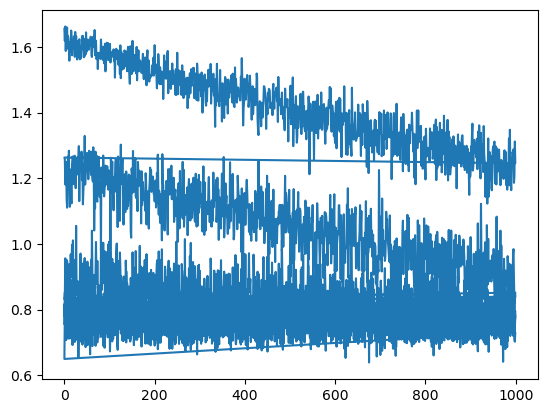

In [142]:
plt.plot(stepi, lossi)

In [144]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(5.6554, grad_fn=<NllLossBackward0>)

In [145]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(5.6667, grad_fn=<NllLossBackward0>)

In [158]:
# Sample from the model

for _ in range (5):
    out = []
    context = [0] * block_size
    counter = 0
    while True & counter < 20:
        # Embed current context using embedding table
        emb = C[torch.tensor([context])] # (1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim = 1)
        ix = torch.multinomial(probs, num_samples = 1, generator = g).item()
        context = context[1:] + [ix]
        out.append(ix)
        counter +=1
        if ix == stoi['SENTENCE_END']:
            break
        if ix == stoi['SENTENCE_START']:
            break
    print(' '.join(itos[i] for i in out))

% about major : ? you said about power where part gun parents the well weeks you and i you `` we and SENTENCE_START
same . , it . fight playing that of got see '' guess ! if way it bot then make ( SENTENCE_START
i myself . those its ] , in each too SENTENCE_START
that live with if sure and | and ? who SENTENCE_START
. performed do i i term but enemy SENTENCE_END
